Notebook to calculate the synchrotron emission from an arbitrary particle energy distribution

In [1]:
import numpy as np
from scipy.integrate import trapz
import matplotlib.pyplot as plt
import matplotlib.colors

from astropy.constants import alpha, c, e, hbar, m_e, m_p, sigma_sb, k_B, M_sun, sigma_T
from astropy import units as u

import naima
from naima.models import ExponentialCutoffPowerLaw, Synchrotron

from auxiliary_functions import free_fall_time

u.default_system = 'cgs'

In [2]:
# Nice-looking plots
nice_fonts = {
        # Use LaTeX to write all text
        "text.usetex": True,
        "font.family": 'serif',
        # Use 10pt font in plots, to match 10pt font in document
        "axes.labelsize": 18,
        "font.size": 18,
        "axes.linewidth":1,
        "axes.titlesize":16,
        # Make the legend/label fonts a little smaller
        "legend.fontsize": 12,
        "xtick.labelsize": 16,
        "ytick.labelsize": 16,
        "xtick.major.size": 5,     # major tick size in points
        "xtick.minor.size": 5,       # minor tick size in points
        "xtick.major.width": 1.4,     # major tick width in points
        "xtick.minor.width": 1.4,     # minor tick width in points
}
matplotlib.rcParams.update(nice_fonts)

### Define the system parameters

In [16]:
# Parameters of the WD
M_WD = 1.0 * u.M_sun
T_WD = 1e5 * u.K
R_WD = 1e3 * u.km
B = 1e2 * u.G

# Parameters of the system
dist = 1 * u.kpc
L_acc = 1e30 * u.erg / u.s

# Other derived parameters
t_ff = free_fall_time(R_WD, M_WD)

### Define the particle energy distribution

In [17]:
# Parameters
amplitude = (L_acc * t_ff / u.erg) / u.eV   # --> NEED SOMETHING REALISTIC HERE
alpha = 2.0
e_cutoff = 1e11 * u.eV
ECPL = ExponentialCutoffPowerLaw(amplitude, 10*u.TeV, alpha, e_cutoff)
ECPL

### Calculate the synchrotron spectra

In [18]:
# Get syn sed
B = 1e-1 * u.G
distance = 1 * u.kpc
Eemin = 1e8*u.eV
SYN = naima.models.Synchrotron(ECPL, B=B, Eemin=Eemin)    

E_phmin = 1e-7 * u.eV
E_phmax = 1e5 * u.eV
E_ph = np.geomspace(E_phmin, E_phmax, 500)
sed_SYN = SYN.sed(E_ph, distance=0) # =0 for luminosities, =dist for fluxes
sed_SYN

# Get SSC SED
#Lsy = SYN.flux(data, distance=0*u.cm)
#R = 0.01 *  (1*u.pc).to(u.cm)
#c = 2.99792458e10 * u.cm / u.second
#phn_sy = Lsy / (4 * np.pi * R**2 * c) * 2.24 # This is the specific density of photons
#IC = naima.models.InverseCompton(Q, seed_photon_fields=[['SSC', data['energy'], phn_sy]], Eemin=Eemin)


<Quantity [3.28844213e+30, 3.53948663e+30, 3.80965686e+30, 4.10040521e+30,
           4.41329379e+30, 4.75000271e+30, 5.11233883e+30, 5.50224531e+30,
           5.92181175e+30, 6.37328516e+30, 6.85908169e+30, 7.38179919e+30,
           7.94423081e+30, 8.54937942e+30, 9.20047327e+30, 9.90098264e+30,
           1.06546377e+31, 1.14654480e+31, 1.23377226e+31, 1.32760927e+31,
           1.42855348e+31, 1.53713966e+31, 1.65394239e+31, 1.77957895e+31,
           1.91471252e+31, 2.06005544e+31, 2.21637282e+31, 2.38448640e+31,
           2.56527860e+31, 2.75969694e+31, 2.96875872e+31, 3.19355603e+31,
           3.43526114e+31, 3.69513220e+31, 3.97451936e+31, 4.27487134e+31,
           4.59774237e+31, 4.94479968e+31, 5.31783140e+31, 5.71875506e+31,
           6.14962659e+31, 6.61264998e+31, 7.11018747e+31, 7.64477050e+31,
           8.21911124e+31, 8.83611495e+31, 9.49889309e+31, 1.02107771e+32,
           1.09753334e+32, 1.17963787e+32, 1.26779968e+32, 1.36245560e+32,
           1.46407276e+32

### Plot the results

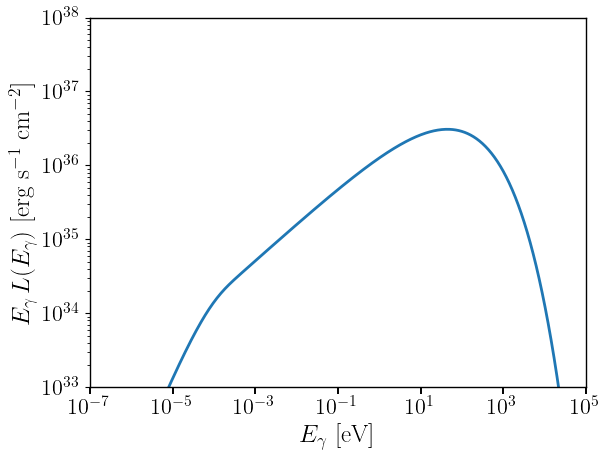

In [21]:
fig, ax = plt.subplots()

# Set labels
plt.title('')
plt.setp(ax, xlabel=r"$E_\gamma$ [eV]")
plt.setp(ax, ylabel=r"$E_\gamma \, L(E_\gamma)$ [erg s$^{-1}$ cm$^{-2}$]")

#ymin, ymax = 1e33, 1e38 # For luminosities
plt.xlim(E_phmin.to("eV").value, E_phmax.to("eV").value)
plt.ylim(ymin, ymax)

plt.plot(E_ph, sed_SYN, ls='-', linewidth=2, label='', zorder=1)
    
ax.loglog() 

plt.show()